In [15]:
import tensorflow as tf

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

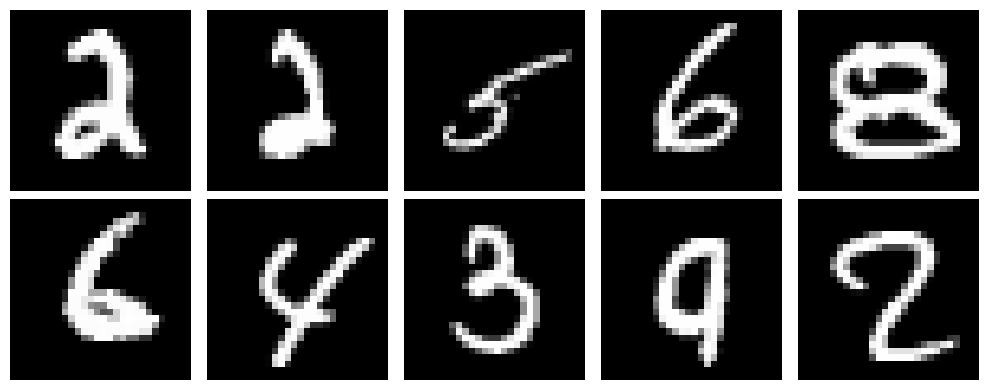

In [18]:
def display_mnist_images(X_train):
    # Load MNIST dataset
    # Select 10 random images from the dataset
    sample_indices = np.random.choice(X_train.shape[0], 10, replace=False)
    sample_images = X_train[sample_indices]

    # Display the images in a grid
    plt.figure(figsize=(10, 4))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(sample_images[i], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function to display images
display_mnist_images(X_train)


In [19]:
def preprocessing(data):
    data=data.astype('float') / 255.0
    return data

In [20]:
X_train, X_test = preprocessing(X_train), preprocessing(X_test)

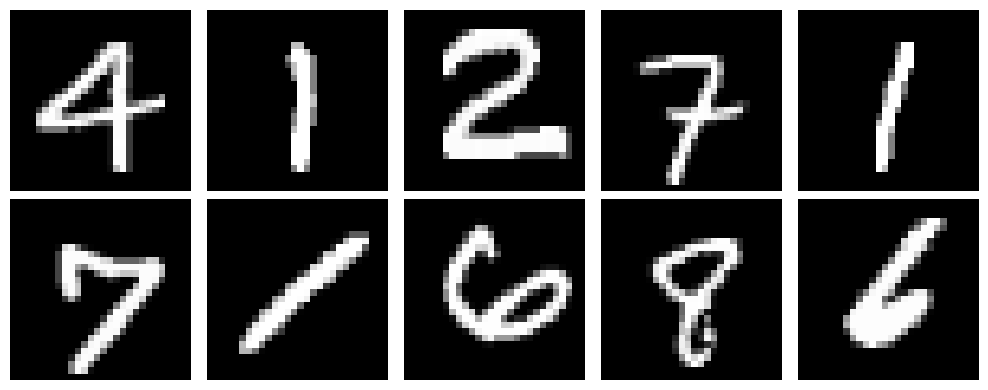

In [21]:
display_mnist_images(X_train)

### Visualizing using TSNE

In [8]:
data = pd.DataFrame(X_train.reshape(60000, -1))
print(data)

data = pd.DataFrame(X_train.reshape(60000, -1))
print(data)


from sklearn.manifold import TSNE
tsne = TSNE()

tsne_res = tsne.fit_transform(data)

       0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
59996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
59997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
59998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
59999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       777  778  779  780  781  782  783  
0      0

KeyboardInterrupt: 

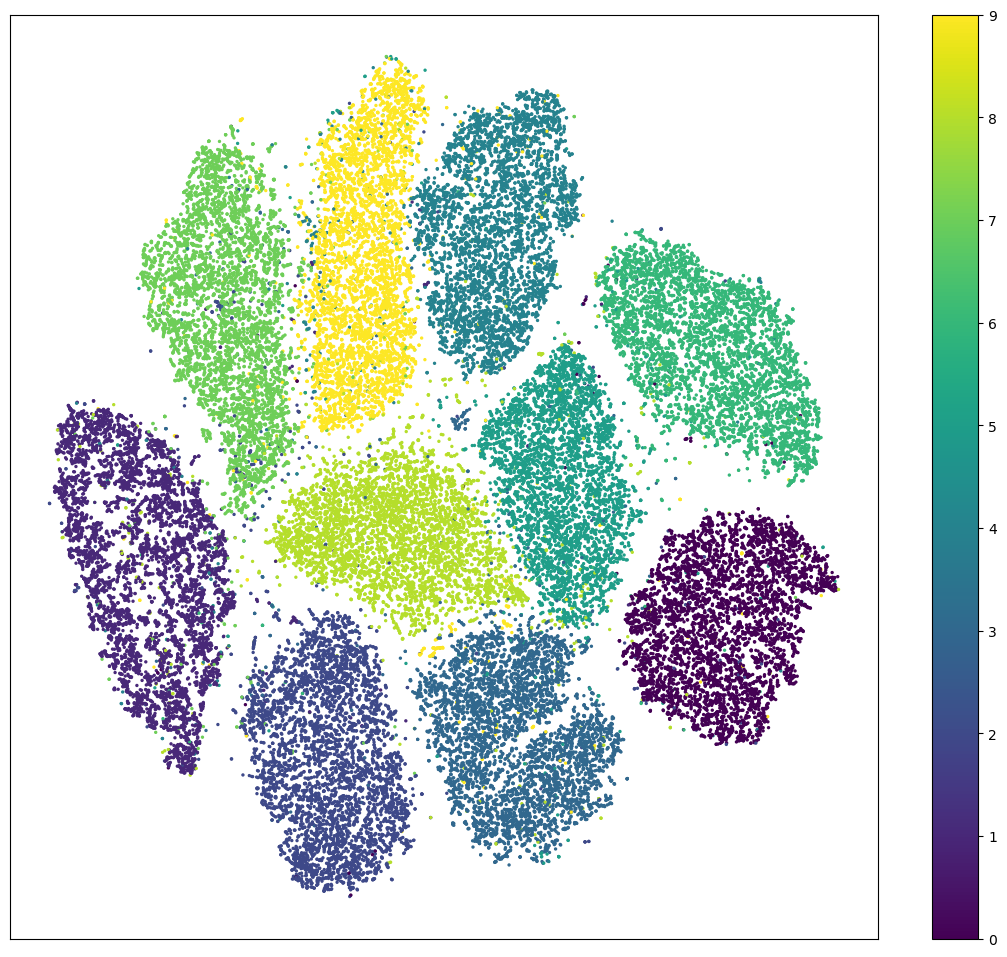

In [16]:
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y_train, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar();
plt.savefig('images/tsne.png')

### Training Using the ANN

In [59]:
## activating GPU dont run if you dont have a GPU

gpus = tf.config.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [40]:
def build_model():
    IMAGE_WIDTH = 28
    IMAGE_HEIGHT = 28
    IMAGE_CHANNELS = 1
    model = tf.keras.models.Sequential([
        tf.keras.layers.Convolution2D(input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
                                      kernel_size=5,
                                      filters = 8,
                                      strides = 1,
                                      activation = 'relu',
                                      kernel_initializer=tf.keras.initializers.VarianceScaling()),
        
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), 
                                     strides=(2, 2)),
        
        tf.keras.layers.Convolution2D(kernel_size=5, 
                                      filters=16, 
                                      strides=1, 
                                      activation='relu', 
                                      kernel_initializer=tf.keras.initializers.VarianceScaling()),
        
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), 
                                     strides=(2, 2)),
        
        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(units=128, activation="relu"),
        
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Dense(units=10, 
                              activation='softmax', 
                              kernel_initializer=tf.keras.initializers.VarianceScaling())
    ])
    
    return model

In [41]:
model = build_model()

In [42]:
model.compile(optimizer="adam", 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [43]:
import datetime

In [44]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch='100,120')
model.fit(X_train, y_train, batch_size=64, epochs=4, callbacks=[tensorboard_callbacks])

Epoch 1/4


C:\Users\Pulkit Gaur\anaconda3\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 [==============================] - 11s 11ms/step - loss: 0.2619 - accuracy: 0.9196
Epoch 2/4
938/938 [==============================] - 10s 10ms/step - loss: 0.0907 - accuracy: 0.9723
Epoch 3/4
938/938 [==============================] - 10s 10ms/step - loss: 0.0655 - accuracy: 0.9796
Epoch 4/4
938/938 [==============================] - 10s 10ms/step - loss: 0.0529 - accuracy: 0.9832


In [39]:
model.save(f"Models/{log_dir}")

INFO:tensorflow:Assets written to: Models/logs/fit/20230821-230545\assets


INFO:tensorflow:Assets written to: Models/logs/fit/20230821-230545\assets


In [11]:
model = tf.keras.models.load_model("Models/logs/fit/20230821-135850")

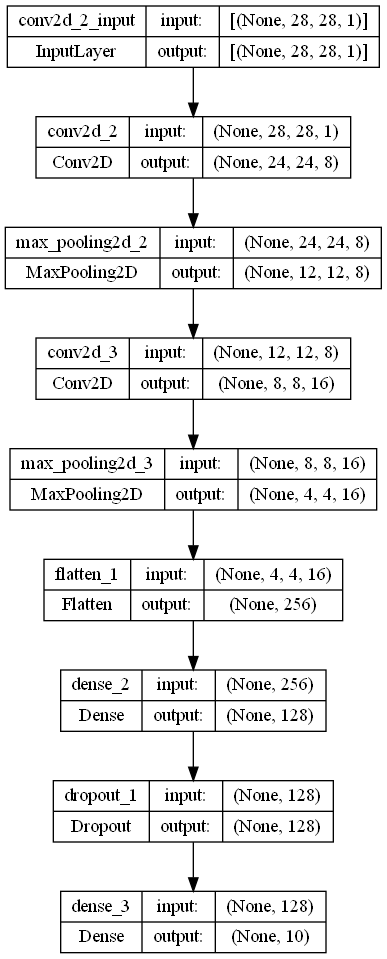

In [33]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file="images/model.png")

In [45]:
model.evaluate(X_test, y_test)

 13/313 [>.............................] - ETA: 1s - loss: 0.0270 - accuracy: 0.9904  

C:\Users\Pulkit Gaur\anaconda3\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 [==============================] - 1s 4ms/step - loss: 0.0415 - accuracy: 0.9856


[0.0414927676320076, 0.9855999946594238]

### Traing Using the LSTM 

In [67]:
batch_size = 64
output = 10

batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28

units = 64
output_size = 10  # labels are from 0 to 9


# Build the RNN model
def LSTM_build_model(allow_cudnn_kernel=True):
    from tensorflow import keras
    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    if allow_cudnn_kernel:
        # The LSTM layer with default options uses CuDNN.
        lstm_layer = keras.layers.LSTM(units, input_shape=(None, input_dim))
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = keras.layers.RNN(
            keras.layers.LSTMCell(units), input_shape=(None, input_dim)
        )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model
        

In [68]:
model = LSTM_build_model(allow_cudnn_kernel=True)

In [70]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)

In [72]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch='100,120')
model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=10, callbacks=[tensorboard_callbacks]
)

Epoch 1/10
938/938 [==============================] - 19s 18ms/step - loss: 0.9589 - accuracy: 0.6948 - val_loss: 0.5728 - val_accuracy: 0.8088
Epoch 2/10
938/938 [==============================] - 15s 16ms/step - loss: 0.3980 - accuracy: 0.8782 - val_loss: 0.3857 - val_accuracy: 0.8728
Epoch 3/10
938/938 [==============================] - 16s 17ms/step - loss: 0.2615 - accuracy: 0.9207 - val_loss: 0.2119 - val_accuracy: 0.9379
Epoch 4/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2082 - accuracy: 0.9367 - val_loss: 0.2215 - val_accuracy: 0.9301
Epoch 5/10
938/938 [==============================] - 15s 16ms/step - loss: 0.1746 - accuracy: 0.9475 - val_loss: 0.1822 - val_accuracy: 0.9416
Epoch 6/10
938/938 [==============================] - 15s 16ms/step - loss: 0.1550 - accuracy: 0.9535 - val_loss: 0.1381 - val_accuracy: 0.9556
Epoch 7/10
938/938 [==============================] - 15s 16ms/step - loss: 0.1393 - accuracy: 0.9571 - val_loss: 0.1509 - val_accuracy:

In [74]:
model.save(f"Models/{log_dir}")

INFO:tensorflow:Assets written to: Models/logs/fit/20230821-235626\assets


INFO:tensorflow:Assets written to: Models/logs/fit/20230821-235626\assets


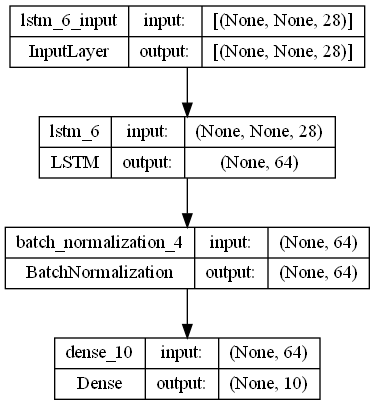

In [75]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='images/lstm.png')

In [77]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1301 - accuracy: 0.9579


[0.13014547526836395, 0.9578999876976013]